# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def input_voltage(t, type='step', amp=10, freq=1, duration=1):
    if type == 'step':
        return amp if t < duration else 0
    elif type == 'triangle':
        return amp * (1 - 2 * abs((t % (1/freq)) * freq - 0.5))
    elif type == 'sin':
        return amp * np.sin(2 * np.pi * freq * t)
    return 0

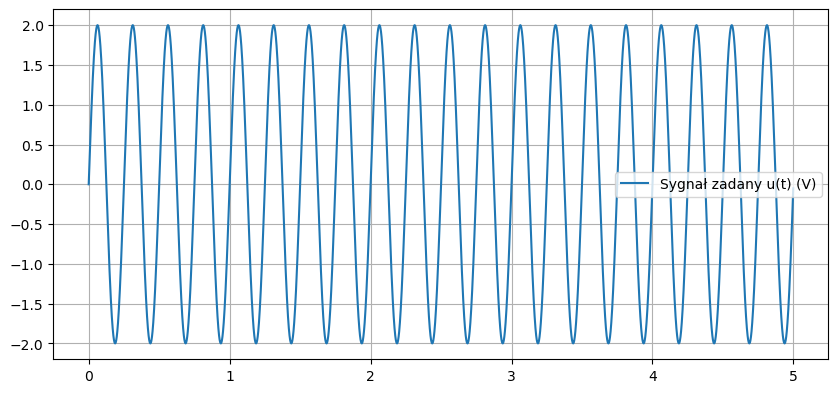

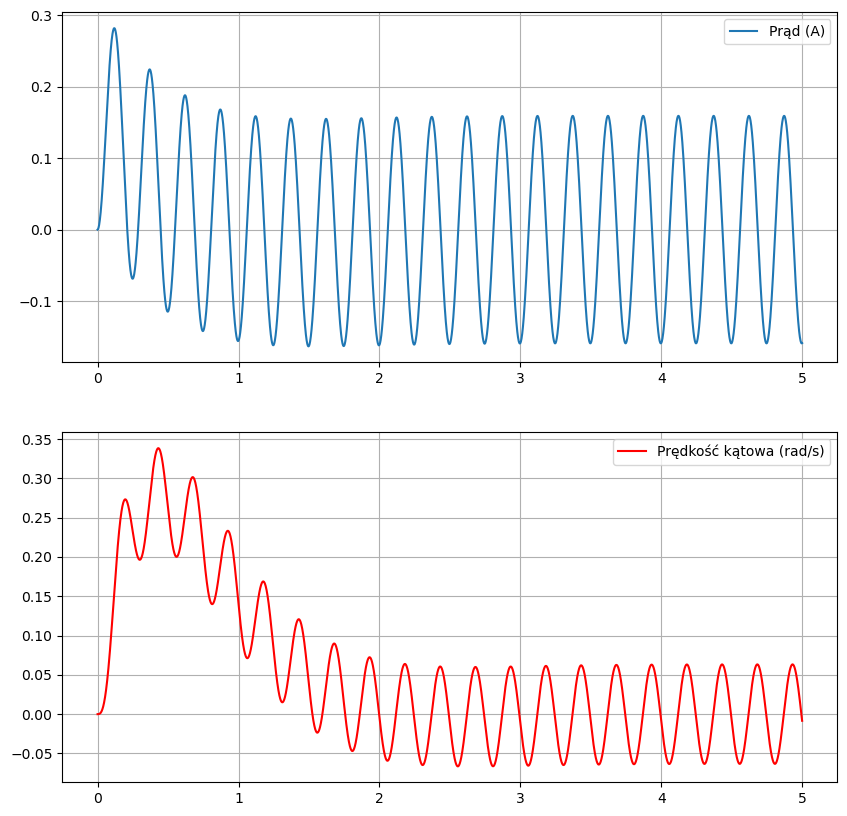

In [42]:
def simulate_motor(R=1, L=0.5, K_T=0.1, K_e=0.1, J=0.01, B=0.02, input_type='step', amp=10, freq=1, duration=1, t_max=5, dt=0.001):

    t_values = np.arange(0, t_max, dt)
    i_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    omega_values = np.zeros_like(t_values)

    i = 0
    omega = 0

    for n in range(1, len(t_values)):
        t = t_values[n]
        V = input_voltage(t, input_type, amp, freq, duration)

        di_dt = (V - R * i - K_e * omega) / L
        domega_dt = (K_T * i - B * omega) / J

        i += di_dt * dt
        omega += domega_dt * dt

        v_values[n] = V
        i_values[n] = i
        omega_values[n] = omega

    # Wykresy wyników
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(t_values, v_values, label='Sygnał zadany u(t) (V)')
    plt.legend()
    plt.grid()

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(t_values, i_values, label='Prąd (A)')
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(t_values, omega_values, label='Prędkość kątowa (rad/s)', color='r')
    plt.legend()
    plt.grid()

    plt.show()

simulate_motor(input_type='sin', amp=2, freq=4, duration=5)